# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"

## LGMVIP March-23

### AUTHOR - Mutyala Harini

#### Advanced Level Task

##### TASK-7- Develop A Neural Network That Can Read Handwriting :

Begin my neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.

##### Dataset link : https://en.wikipedia.org/wiki/MNIST_database

### Importing Libraries

In [1]:
#Importing packages
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Loading dataset

In [2]:
#loading dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 13s 1us/step


### Displaying Some images

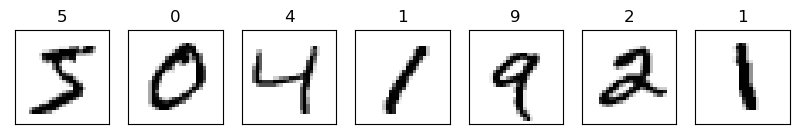

In [8]:
#Dataset properties
# Display some images
fig, axes = plt.subplots(ncols=7, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(7):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

#### Pre-processing the data

In [9]:
# Pre-processing the data
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [11]:
#applying normalization
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

## Creating the model

### Model Architecture

We will have to first build the model architecture and define it based on our dataset. We are going to add the following layers:

* Conv2D - for the convolution layers
* Dropout - to prevent overfitting
* Dense - a fully connected layer
* Softmax activation - This is used to convert all predictions into probability
* The model architecture can be tuned to get optimal performance

so i am goimg to create a model with

CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [13]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

### Training the model

In [15]:
# Train the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 3419s 2s/step - loss: 0.2869 - accuracy: 0.9156 - val_loss: 0.0786 - val_accuracy: 0.9785
Epoch 2/10
1688/1688 [==============================] - 354s 210ms/step - loss: 0.1160 - accuracy: 0.9659 - val_loss: 0.0777 - val_accuracy: 0.9830
Epoch 3/10
1688/1688 [==============================] - 359s 213ms/step - loss: 0.0885 - accuracy: 0.9744 - val_loss: 0.1144 - val_accuracy: 0.9783
Epoch 4/10
1688/1688 [==============================] - 361s 214ms/step - loss: 0.0737 - accuracy: 0.9784 - val_loss: 0.0561 - val_accuracy: 0.9877
Epoch 5/10
1688/1688 [==============================] - 359s 213ms/step - loss: 0.0665 - accuracy: 0.9806 - val_loss: 0.0779 - val_accuracy: 0.9853
Epoch 6/10
1688/1688 [==============================] - 354s 210ms/step - loss: 0.0579 - accuracy: 0.9833 - val_loss: 0.0633 - val_accuracy: 0.9898
Epoch 7/10
1688/1688 [==============================] - 360s 213ms/step - loss: 0.0546 - accuracy: 0.9836 - val_lo

### Evaluating the model

In [16]:
# Evaluate the model
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 13s 40ms/step - loss: 5.5290 - accuracy: 0.9816
Test Loss 5.528995513916016
Test Accuracy 0.9815999865531921


### Testing the Model

313/313 [==============================] - 12s 38ms/step
Predicted Value:  9
Successful prediction


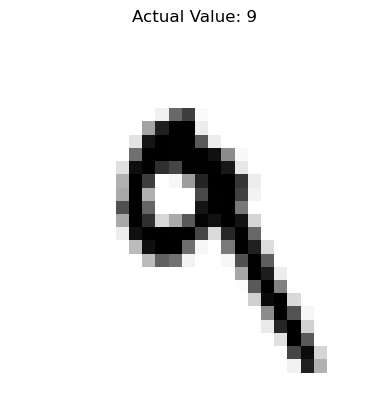

In [20]:
# Testing the Model
plt.imshow(x_test[7],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[7]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[7]))
if(y_test[7]==(np.argmax(prediction[7]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 12s 37ms/step
Predicted Value:  2
Successful prediction


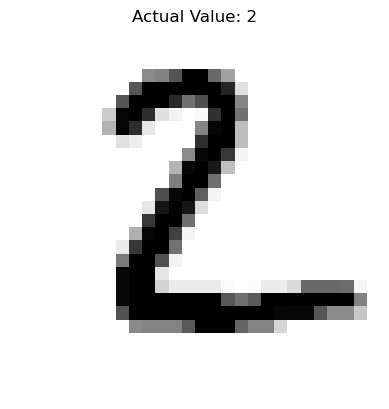

In [21]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')



### Thank you

### - Mutyala Harini